In [1]:
import pandas as pd
import numpy as np

# Data Source

O backloggd.com é um site onde jogadores podem avaliar, recomendar, listar  e acompanhar os jogos, sendo assim, existe uma base de dados contendo os jogadores e dos jogos. Esse dataset obtido atráves do Kaggle contém dados no intervalo de tempo de 1980 até 2023, nome, sinopse, avaliações e métricas sobre os jogos.

Dicionário de Dados:



| Variável      | Descrição |
| ----------- | ----------- |
| Title      | Nome do jogo       |
| Release Date   | Data de lançamento        |
| Team      | Empresas que desenvolveram o jogo       |
| Rating      | Nota da avaliação do jogo       |
| Time Listed      | Quantidade de vezes que um jogo foi adicionado em uma lista       |
| Number of Reviews      | Quantidade de pessoas que avaliaram o jogo       |
| Genres      | Genêros do jogo       |
| Summary      | Sinopse do jogo      |
| Reviews      | Crítica de especialistas       |
| Play      | Quantidade de jogadores       |
| Playing      | Quantidade de jogadores ativos       |
| Backlogs      | Quantidade de jogadores que acompanham o jogo       |
| Wishlist      | Quantidade de jogadores que querem o jogo       |

In [2]:
df = pd.read_csv('games.csv')
df.head()

,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
1,1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K
2,2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30K,2.5K,5K,2.6K
3,3,Undertale,"Sep 15, 2015","['tobyfox', '8-4']",4.2,3.5K,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28K,679,4.9K,1.8K
4,4,Hollow Knight,"Feb 24, 2017",['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21K,2.4K,8.3K,2.3K


# Data Preparation

### Inspecting the data

In [3]:
df.sample(2)

,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
1196,1196,Call of Duty: Advanced Warfare,"Nov 03, 2014","['Activision', 'Sledgehammer Games']",2.5,415,415,['Shooter'],Call of Duty: Advanced Warfare envisions the p...,"['Me julguem mas eu gosto desse jogo, a campan...",5.2K,13,308,151
1272,1272,Ni no Kuni II: Revenant Kingdom,"Mar 23, 2018","['Bandai Namco Entertainment', 'Level-5']",3.3,269,269,"['Adventure', 'RPG']",The sequel to Ni no Kuni being developed for W...,"['A mi este juego me encanto, es cierto que mu...",1.7K,81,1.5K,537


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1512 non-null   int64  
 1   Title              1512 non-null   object 
 2   Release Date       1512 non-null   object 
 3   Team               1511 non-null   object 
 4   Rating             1499 non-null   float64
 5   Times Listed       1512 non-null   object 
 6   Number of Reviews  1512 non-null   object 
 7   Genres             1512 non-null   object 
 8   Summary            1511 non-null   object 
 9   Reviews            1512 non-null   object 
 10  Plays              1512 non-null   object 
 11  Playing            1512 non-null   object 
 12  Backlogs           1512 non-null   object 
 13  Wishlist           1512 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 165.5+ KB


In [5]:
dup_count = df.duplicated().sum()

print(f"There are {dup_count} duplicate values in the dataset")
del(dup_count)

There are 0 duplicate values in the dataset


In [6]:
null_count = df.isnull().sum()

print(null_count[null_count != 0])
del(null_count)

Team        1
Rating     13
Summary     1
dtype: int64


Com a inspeção de dados foi possivel perceber as seguintes informações:
- As tabelas que não serão interessantes para a análise:
    - 'Unnamed: 0'
    - 'Reviews'
    - 'Summary'
    - 'Time Listed'
    - 'Backlogs'
- Não existem dados duplicados
- Existem dados faltantes
    - Team: 1
    - Rating: 13
    - Summary: 1

### Data Cleaning and Preprocessing 

In [7]:
df = df.drop(['Unnamed: 0', 'Reviews', 'Summary', 'Times Listed', 'Backlogs'], axis=1)

In [8]:
df = df[df['Release Date'] != 'releases on TBD']

In [9]:
df["Release Date"] = pd.to_datetime(df["Release Date"])
df = df[df['Release Date'] < '03-31-2023']

In [10]:
for col in ['Genres', 'Team']:
    df[col] = df[col].str.replace("[", "").str.replace("]", "").str.replace("'", "").str.replace(" ", "")

In [11]:
#substituir nome da coluna 'Number of Reviews' para 'Reviews'
df = df.rename(columns={'Number of Reviews': 'Reviews'})

In [12]:
numeric_columns = ['Reviews', 'Plays', 'Playing', 'Wishlist']

for col in numeric_columns:
    df[col] = df[col].str.replace("K", "000")
    # transformar em float e multiplicar por 1000 apenas onde contém '.'
    df[col] = df[col].apply(lambda x: float(x)*1000 if '.' in x else x)
    df[col] = df[col].astype(int)

df[numeric_columns].head()

,Reviews,Plays,Playing,Wishlist
0,3900,17000,3800,4800
1,2900,21000,3200,3600
2,4300,30000,2500,2600
3,3500,28000,679,1800
4,3000,21000,2400,2300


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1499 entries, 0 to 1511
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Title         1499 non-null   object        
 1   Release Date  1499 non-null   datetime64[ns]
 2   Team          1498 non-null   object        
 3   Rating        1497 non-null   float64       
 4   Reviews       1499 non-null   int32         
 5   Genres        1499 non-null   object        
 6   Plays         1499 non-null   int32         
 7   Playing       1499 non-null   int32         
 8   Wishlist      1499 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(4), object(3)
memory usage: 93.7+ KB


# Exploratory Data Analysis (EDA)

In [36]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.offline as py

In [37]:
py.init_notebook_mode(connected=True)

### Boxsplot

In [16]:
df[numeric_columns].describe()

,Reviews,Plays,Playing,Wishlist
count,1499.000000,1499.000000,1499.000000,1499.000000
mean,774.434290,6306.827885,269.621081,777.190794
std,688.581148,5892.478384,427.611873,794.114757
min,0.000000,1.000000,0.000000,2.000000
25%,293.000000,1900.000000,44.000000,212.000000
50%,555.000000,4300.000000,115.000000,496.000000
75%,1000.000000,9100.000000,302.000000,1100.000000
max,4300.000000,33000.000000,3800.000000,4800.000000


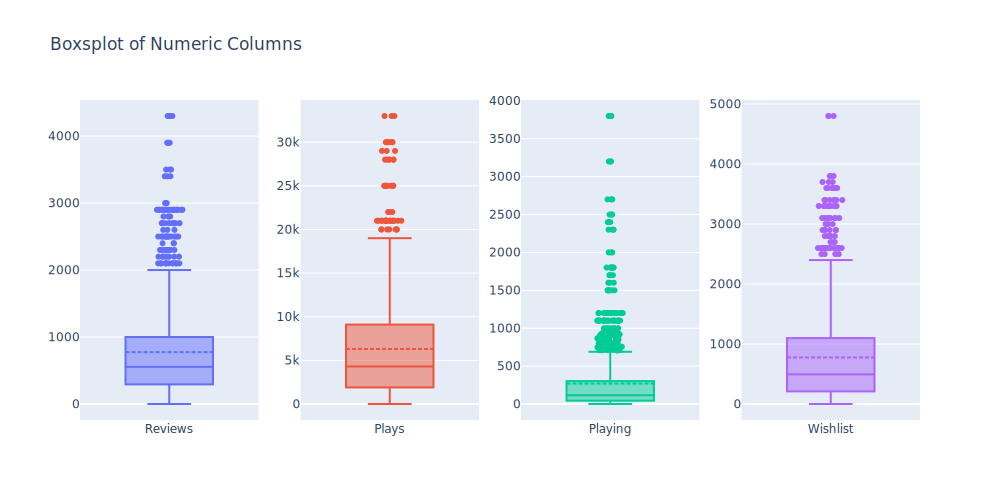

In [17]:
fig = go.Figure()
fig = make_subplots(rows=1, cols=len(numeric_columns))
for i, var in enumerate(numeric_columns):
    fig.add_trace(
        go.Box(y=df[var],
        name=var,
        boxmean=True),
        row=1, col=i+1
    )
fig.update_layout(title=dict(text="Boxsplot of Numeric Columns"), showlegend=False)
fig.update_traces(jitter=.3)
fig.update_layout(width=1000, height=500)
fig.show("svg")

<p style="font-size: 15px">Com o boxsplot é possível perceber a existência de outlier e o quão distantes eles estão da média, ou seja, para essa quantidade de jogos a média é baixa em comparação ao valor máximo demonstrando que poucos jogos são muito populares dentre os jogadores que utilizam a plataforma.</p>
<p style="font-size: 15px">Um destaque para as variáveis Plays e Playing, que demostram a quantidade de jogadores totais e a quantidade de jogadores ativos respectivamente, onde a média de jogadores ativos é muito menor que a média de jogadores totais, ou seja, a maioria dos jogadores não mantém ativos em um jogo.</p>

### Popularity Gender

In [18]:
genres = df["Genres"].str.get_dummies(",")
genres.sum().sort_values(ascending=False).head(10)

Adventure            1005
RPG                   515
Shooter               351
Platform              329
Indie                 282
Puzzle                174
Brawler               157
Strategy              142
Simulator             125
TurnBasedStrategy      99
dtype: int64

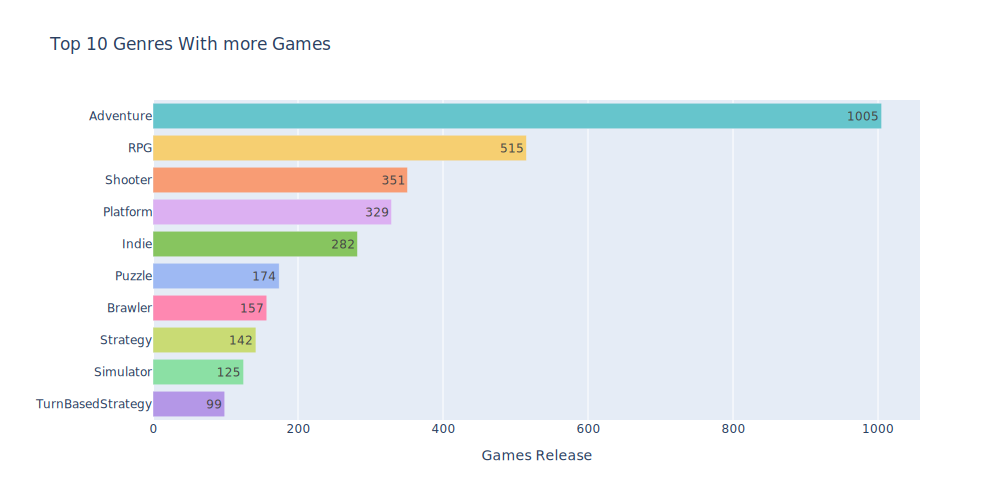

In [19]:
fig = px.bar(x=genres.sum().sort_values(ascending=False).head(10), 
             y=genres.sum().sort_values(ascending=False).head(10).index,
             title="Top 10 Genres With more Games",
             color=genres.sum().sort_values(ascending=False).head(10).index,
             color_discrete_sequence=px.colors.qualitative.Pastel,
             text=genres.sum().sort_values(ascending=False).head(10))

fig.update_layout(hovermode=False)
fig.update_yaxes(title='', visible=True, showticklabels=True, autorange="reversed")
fig.update_layout(showlegend=False)
fig.update_xaxes(title='Games Release', visible=True, showticklabels=True)
fig.update_layout(width=1000, height=500)
fig.show("svg")

<p style="font-size: 15px">Com o gráfico de barras é possível perceber que o gênero de aventura é muito mais frequente que os outros, mas os gêneros abaixo tem uma variação muito menor entre eles. Com essa informação podemos ver a preferencia dos jogadores da plataforma por esse gênero.</p>

### Month With more Realeases

In [20]:
order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

df['Release Date'].dt.month_name().value_counts().reindex(order)

Release Date
January       89
February     111
March        139
April         85
May           83
June         104
July          91
August        87
September    189
October      191
November     218
December     112
Name: count, dtype: int64

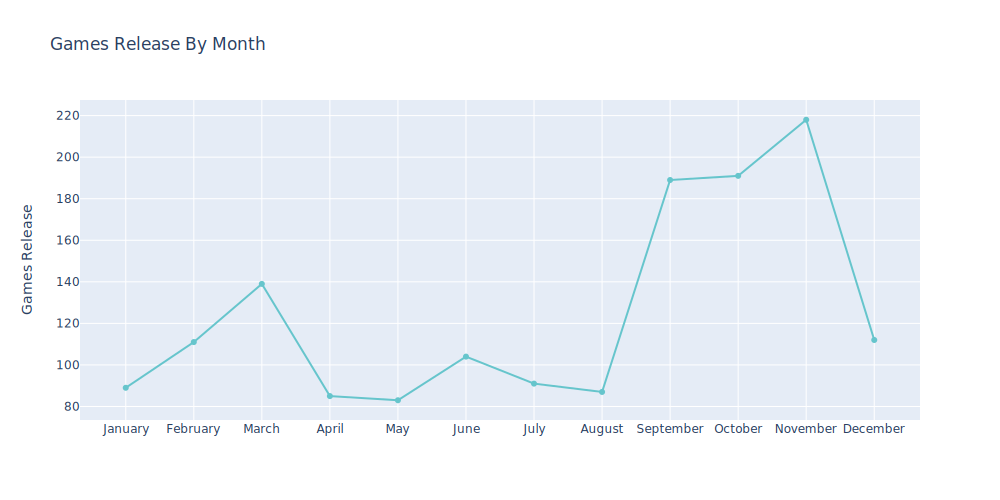

In [21]:
df['Release Date'].dt.month_name().value_counts().reindex(order)
fig = px.line(df['Release Date'].dt.month_name().value_counts().reindex(order), 
              x=order, y='count', 
              title='Games Release By Month',
              labels={'count': 'Games Release', 'x': 'Month'},
              color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_traces(mode='markers+lines')
fig.update_yaxes(title='Games Release', visible=True, showticklabels=True)
fig.update_xaxes(title='', visible=True, showticklabels=True)
fig.update_layout(width=1000, height=500)
fig.show("svg")

<p style='font-size:15px;'>O gráfico mostra 3 meses consecutivos que tem muito mais lançamentos que os outros meses, sendo eles setembro, outubro e novembro, durante todo o resto do ano se tem bem menos lançamento que esses meses juntos. No mês de novembro tem 218 jogos lançados, sendo assim o mês que mais tem lançamentos.</p>

### Correlation Between Numeric Columns

In [22]:
correlation = df[numeric_columns].corr()
correlation

,Reviews,Plays,Playing,Wishlist
Reviews,1.000000,0.816397,0.684614,0.723284
Plays,0.816397,1.000000,0.535058,0.359889
Playing,0.684614,0.535058,1.000000,0.657310
Wishlist,0.723284,0.359889,0.657310,1.000000


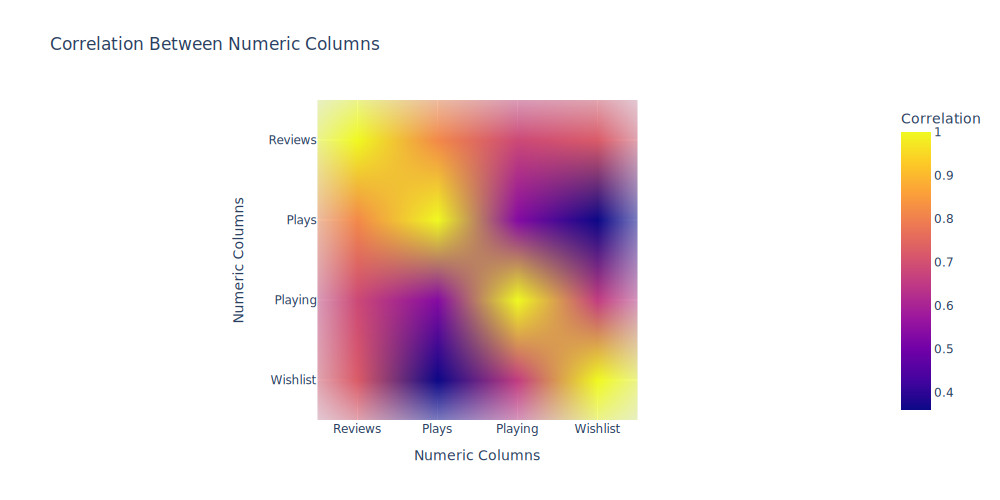

In [39]:
#tornar a matriz correlation em um gráfico de calor
fig = px.imshow(correlation,
                labels=dict(x="Numeric Columns", y="Numeric Columns", color="Correlation"),
                x=numeric_columns,
                y=numeric_columns,
                color_continuous_scale=px.colors.sequential.Plasma,
                title="Correlation Between Numeric Columns")
fig.update_layout(width=1000, height=500)
fig.show("svg")

<p style='font-size:15px;'>A matriz de responde a correlação existente entre as variáveis númericas, podemos perceber que existem duas relações fortes( Pearson = 0,7 a 0,9 ), três moderadas( Pearson = 0,5 a 0,7 ) e apenas uma relação fraca( Pearson = 0,3 a 0,5 )</p>

### Games By Year

In [24]:
df_year = pd.DataFrame(df['Release Date'].dt.year.value_counts().sort_index())
df_year = df_year.reset_index()
df_year.columns = ['Year', 'Games Release']
df_year = df_year.sort_values(by='Year')

df_year = df_year[(df_year['Year'] > 1990) & (df_year['Year'] != 2023)]
df_year.tail()

,Year,Games Release
35,2018,77
36,2019,87
37,2020,74
38,2021,97
39,2022,132


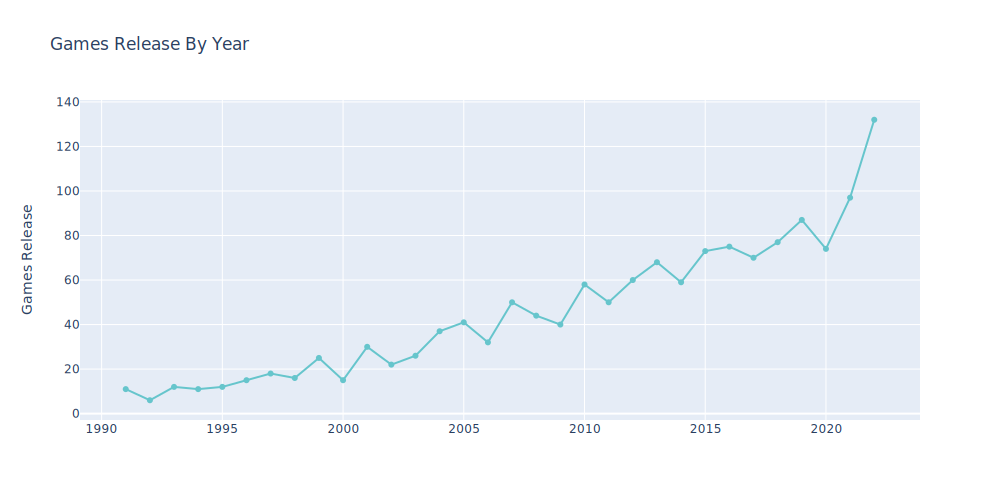

In [25]:
#games by year in a line chart
fig = px.line(df['Release Date'].dt.year.value_counts().sort_index(),
                x=df_year['Year'],
                y=df_year['Games Release'],
                title="Games Release By Year",
                labels={'x': 'Year', 'y': 'Games Release'},
                color_discrete_sequence=px.colors.qualitative.Pastel)


fig.update_traces(mode='markers+lines')
fig.update_yaxes(title='Games Release', visible=True, showticklabels=True)
fig.update_xaxes(title='', visible=True, showticklabels=True)
fig.update_layout(width=1000, height=500)
fig.show("svg")

<p style="font-size:15px;">Como os dados de 2023 ainda não estão completos será preciso usar da regressão linear para estimar quantos jogos serão adicionados a plataforma nesse ano</p>

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [27]:
reg = LinearRegression()
reg.fit(df_year[['Year']].values, df_year['Games Release'])
prev = reg.predict([[2023]])
print(f"Previsão 2023 é: {round(prev[0])}")
if not (df_year['Year'].max() == 2023):
    df_year = pd.concat([df_year, pd.DataFrame({'Year': [2023], 'Games Release': round(prev[0])})])

Previsão 2023 é: 96


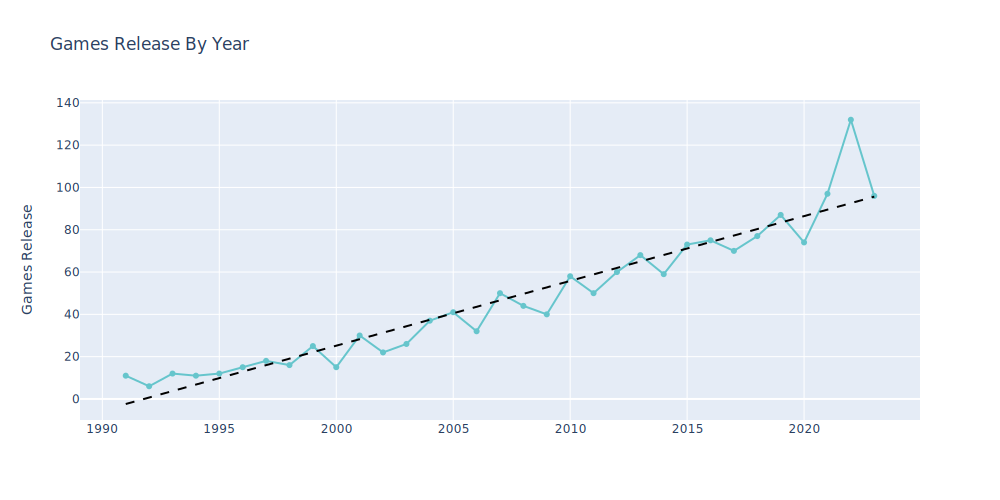

In [28]:
fig = px.line(df['Release Date'].dt.year.value_counts().sort_index(),
                x=df_year['Year'],
                y=df_year['Games Release'],
                title="Games Release By Year",
                labels={'x': 'Year', 'y': 'Games Release'},
                color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_traces(mode='markers+lines')

fig.add_trace(go.Scatter(x=df_year['Year'], y=reg.predict(df_year[['Year']].values),
                    mode='lines',
                    name='Trend Line',
                    line=dict(color='black', dash='dash')))


fig.update_yaxes(title='Games Release', visible=True, showticklabels=True)
fig.update_xaxes(title='', visible=True, showticklabels=True)
fig.update_layout(showlegend=False)
fig.update_layout(width=1000, height=500)
fig.show("svg")

Com o gráfico de lançamentos é possível perceber que a quantidade de jogos lançados por anos bem crescendo, dando destaque para 2023, que foi o ano que mais teve lançamentos na base de dados. A regressão linear dá a expectativa de que 96 jogos que sejam lançados em 2023 serão adicionados a plataforma.

### Games With More Engagment

In [29]:
df_engagement = df[(df["Playing"] != 0) & (df['Playing'] > 9)][['Title','Plays', 'Playing', 'Reviews', 'Wishlist','Rating']].drop_duplicates().reset_index(drop=True)
df_engagement['Engagement'] = df_engagement['Playing'] + df_engagement['Reviews'] + df_engagement['Wishlist'] + df_engagement['Rating']*1000
df_engagement['Engagement'] = df_engagement['Engagement'] / df_engagement['Plays']
df_engagement = df_engagement.sort_values(by='Engagement', ascending=False)
df_engagement.head()

,Title,Plays,Playing,Reviews,Wishlist,Rating,Engagement
868,Tokyo Necro,14,22,21,69,4.6,336.571429
991,Phantom Brigade,16,10,16,51,2.8,179.812500
437,Bayonetta Origins: Cereza and the Lost Demon,48,40,116,329,4.0,93.437500
816,Labyrinth of Galleria: The Moon Society,67,26,49,193,4.3,68.179104
792,Wild Hearts,73,45,103,246,3.2,49.232877


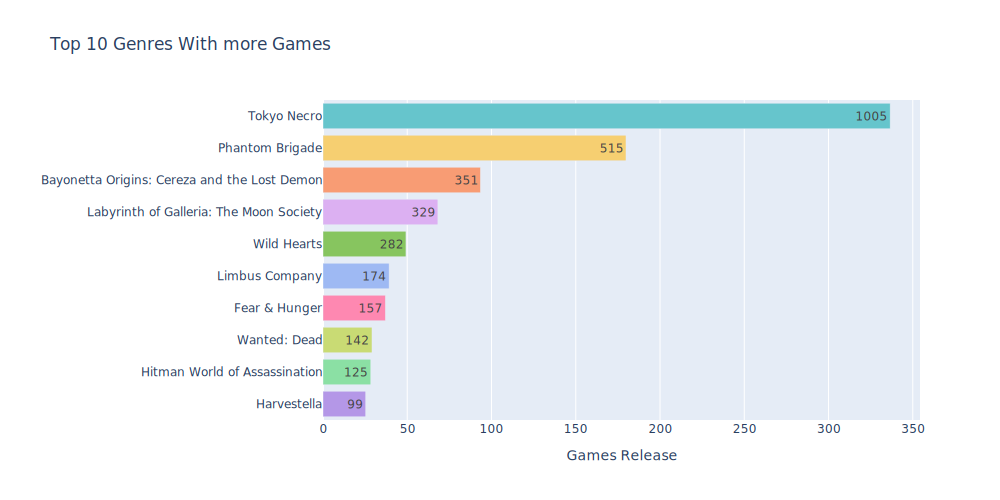

In [30]:
fig = px.bar(x=df_engagement['Engagement'].head(10), 
             y=df_engagement['Title'].head(10),
             title="Top 10 Genres With more Games",
             color=genres.sum().sort_values(ascending=False).head(10).index,
             color_discrete_sequence=px.colors.qualitative.Pastel,
             text=genres.sum().sort_values(ascending=False).head(10))

fig.update_layout(hovermode=False)
fig.update_yaxes(title='', visible=True, showticklabels=True, autorange="reversed")
fig.update_layout(showlegend=False)
fig.update_xaxes(title='Games Release', visible=True, showticklabels=True)
fig.update_layout(width=1000, height=500)
fig.show("svg")

Baseado no calculo de engajamento de redes sociais, soma de todas as interações por todas as pessoas que viram a postagem, foi calculado o engajamento dos jogos. Apesar de apenas os jogos com poucos jogadores tenham tido um engajamento alto, o cálculo de engajamento é importante para saber quais jogos recomendar.

### Conclusion

Com o box splot foi possível obersavar como os valores númericos se comportavam dentro do seu próprio escopo, isso é importante para saber se os dados estão muito distantes da média, ou seja, se existem muitos outliers. Com isso foi descoberto que a média de jogadores ativos é muito menor que a média de jogadores totais, ou seja, a maioria dos jogadores não mantém ativos em um jogo.

Minha análise dos videogames de 1980 a 2023 revelou vários insights importantes. foi descoberto os gêneros com mais jogos lançados, sendo o maior aventura que tem muito mais lançamento que os outros genêros, mas os outros genêros tem uma variação muito menor entre eles.

Também foi descoberto que os meses de setembro, outubro e novembro são os meses com mais lançamentos, sendo novembro o mês com mais lançamentos, com 218 jogos lançados.

Para a correlação entre os valores númericos foi descoberto que 2 delas tem uma corelação forte, 3 tem uma correlação moderada e apenas 1 tem uma correlação fraca. Isso foi obersavo através do coeficiente de correlação de Pearson.

Foi observado que a classificação média dos videogames sofreu flutuações significativas de 1980 até a década de 1990, com um declínio notável no final da década de 1980. Entretanto, a partir dos anos 2000, a classificação média tornou-se mais estável e consistente.

Em termos de engajamento dos jogadores, descobri que o Tokyo Necro tinha o nível mais alto de engajamento, mesmo os jogos com mais engajmaento tendo poucos jogadores, o cálculo de engajamento é importante para saber quais jogos recomendar.

